# Mastercurve Model Comparison

Template to compare multiple models on mastercurve data (polystyrene).

**Data:** examples/data/pyRheo/polystyrene/master_curve_ps_oscillation_data.csv

In [1]:
# Google Colab compatibility - uncomment if running in Colab
# !pip install -q rheojax
# from google.colab import drive
# drive.mount('/content/drive')


## Setup and Imports

In [2]:
# Configure matplotlib for inline plotting in VS Code/Jupyter
%matplotlib inline

import warnings
from pathlib import Path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from rheojax.core.data import RheoData
from rheojax.core.jax_config import safe_import_jax, verify_float64
from rheojax.models.fractional_maxwell_model import FractionalMaxwellModel
from rheojax.models.generalized_maxwell import GeneralizedMaxwell
from rheojax.pipeline.base import Pipeline
from rheojax.transforms.mastercurve import Mastercurve

jax, jnp = safe_import_jax()
verify_float64()
np.set_printoptions(precision=4, suppress=True)
plt.rcParams['figure.figsize'] = (10, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore', category=RuntimeWarning)

def r2_complex(y_true: np.ndarray, y_pred: np.ndarray) -> float:
    y_true = np.asarray(y_true)
    y_pred = np.asarray(y_pred)
    ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
    ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
    return float(1 - ss_res / ss_tot)
import arviz as az


INFO:2025-12-06 19:55:17,766:jax._src.xla_bridge:808: Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Unable to initialize backend 'tpu': INTERNAL: Failed to open libtpu.so: dlopen(libtpu.so, 0x0001): tried: 'libtpu.so' (no such file), '/System/Volumes/Preboot/Cryptexes/OSlibtpu.so' (no such file), '/usr/lib/libtpu.so' (no such file, not in dyld cache), 'libtpu.so' (no such file)


Loading rheojax version 0.4.0


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/piblin_jax/__init__.py:28: UserWarning: GPU acceleration is only available on Linux with CUDA 12+. Using JAX in CPU mode.
  from . import backend, data, dataio, transform


Found 'auto' as default backend, checking available backends


Matplotlib is available, defining as default backend


arviz_base available, exposing its functions as part of arviz.preview


arviz_stats available, exposing its functions as part of arviz.preview


arviz_plots available, exposing its functions as part of arviz.preview


## Load mastercurve (polystyrene)

In [3]:
DATA_DIR = Path.cwd().parent / 'data' / 'pyRheo' / 'polystyrene'
df = pd.read_csv(DATA_DIR / 'master_curve_ps_oscillation_data.csv')
omega = df['Angular Frequency'].to_numpy()
Gp = df['Storage Modulus'].to_numpy()
Gpp = df['Loss Modulus'].to_numpy()
G_star = Gp + 1j*Gpp


## Compare candidate models

In [4]:
candidates = [
    ('GM-3', GeneralizedMaxwell(n_modes=3, modulus_type='tensile')),
    ('GM-5', GeneralizedMaxwell(n_modes=5, modulus_type='tensile')),
    ('GM-7', GeneralizedMaxwell(n_modes=7, modulus_type='tensile')),
    ('FracMax', FractionalMaxwellModel()),
]
rows = []
for name, model in candidates:
    try:
        model.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
        pred = model.predict(omega)
        if pred.ndim == 2:
            pred = pred[:,0] + 1j*pred[:,1]
        r2 = r2_complex(G_star, pred)
        rows.append({'model': name, 'r2': r2})
    except Exception as exc:
        rows.append({'model': name, 'r2': np.nan, 'error': str(exc)})

pd.DataFrame(rows)


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.314628s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=1.315s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.325838s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.326s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.616595s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.617s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.974139s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=13 | final_cost=1.068466e+13 | time=0.974s | final_gradient_norm=3.356411894713626e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 11, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.291392s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=13 | final_cost=1.068466e+13 | time=0.291s | final_gradient_norm=3.356411894713626e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 9, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.875127s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=1 | final_cost=1.118755e+13 | time=0.875s | final_gradient_norm=3.56511362901958e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.186819s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=1 | final_cost=1.261868e+13 | time=0.187s | final_gradient_norm=3.930836899585671e+23


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.543661s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=28 | final_cost=9.735038e+11 | time=0.544s | final_gradient_norm=801779923.3537974


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.829260s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=12 | final_cost=3.688319e+12 | time=0.829s | final_gradient_norm=1436000963.6077752


Element minimization: reducing from 5 to 2 modes


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.110605s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=1.111s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.376332s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.376s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.064071s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=1.064s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 1.088956s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=30 | final_cost=7.099389e+00 | time=1.089s | final_gradient_norm=0.0065040219009454515


,model,r2
0,GM-3,0.993697
1,GM-5,0.982704
2,GM-7,0.999579
3,FracMax,-43733.637158


## Visualize top 2

Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.388816s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.389s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.394792s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.395s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.278293s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=0.278s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.348382s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.348s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.345743s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.346s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.209650s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.210s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


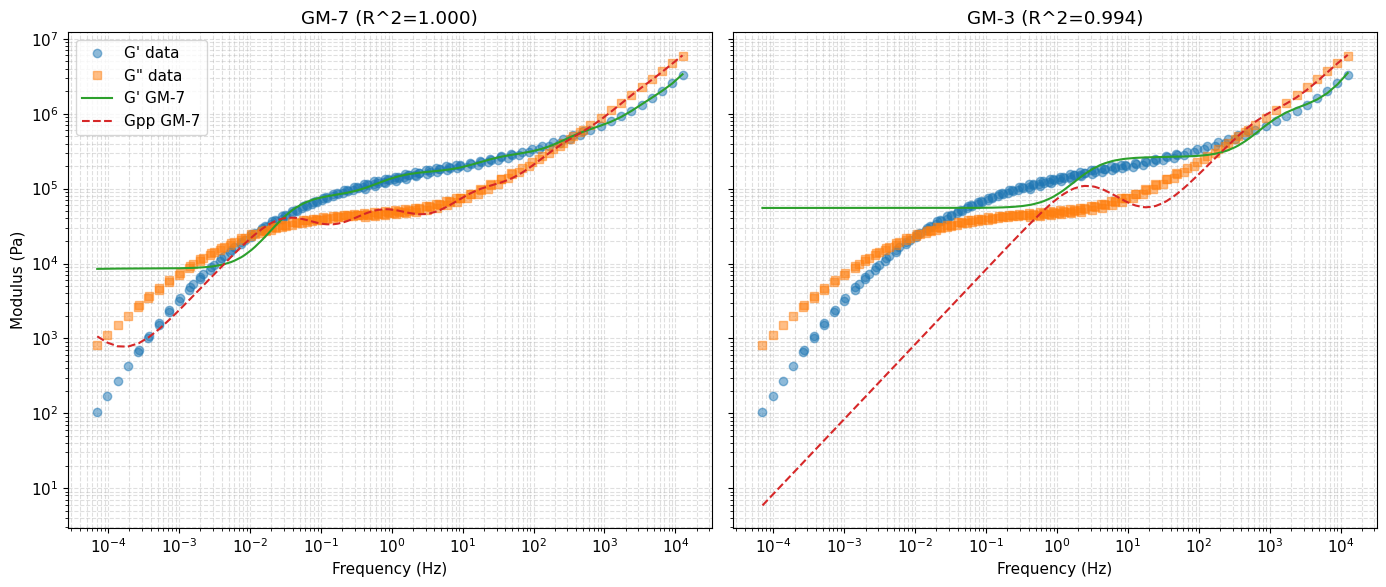

In [5]:
top2 = sorted([r for r in rows if np.isfinite(r['r2'])], key=lambda x: x['r2'], reverse=True)[:2]
freq_hz = omega/(2*np.pi)
fig, axes = plt.subplots(1, len(top2), figsize=(14,6), sharey=True)
for ax, rec in zip(axes, top2):
    model = dict(candidates)[rec['model']]
    model.fit(omega, G_star, test_mode='oscillation', use_log_residuals=True)
    pred = model.predict(omega)
    if pred.ndim == 2:
        pred = pred[:,0] + 1j*pred[:,1]
    ax.loglog(freq_hz, np.real(G_star), 'o', label="G' data", alpha=0.5)
    ax.loglog(freq_hz, np.imag(G_star), 's', label='G" data', alpha=0.5)
    ax.loglog(freq_hz, np.real(pred), '-', label=f"G' {rec['model']}")
    ax.loglog(freq_hz, np.imag(pred), '--', label=f"Gpp {rec['model']}")
    ax.set_title(f"{rec['model']} (R^2={rec['r2']:.3f})")
    ax.grid(True, which='both', ls='--', alpha=0.4)
for ax in axes:
    ax.set_xlabel('Frequency (Hz)')
axes[0].set_ylabel('Modulus (Pa)')
axes[0].legend()
plt.tight_layout()
display(fig)
plt.close(fig)

## Bayesian workflow (NLSQ → best model → NUTS diagnostics)

Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.343075s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.343s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 7, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.342277s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=64 | final_cost=3.547677e+11 | time=0.342s | final_gradient_norm=248598245.35240754


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.207972s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=19 | final_cost=9.735034e+11 | time=0.208s | final_gradient_norm=1.5340190487145265e+19


Element minimization: early termination at n_modes=2 (R²=0.982707 < threshold=0.990547)


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.258192s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=47 | final_cost=9.735035e+11 | time=0.258s | final_gradient_norm=692647729.9577972


Starting least squares optimization | {'method': 'trf', 'n_params': 5, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.259339s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=47 | final_cost=9.735035e+11 | time=0.259s | final_gradient_norm=692647729.9577972


Starting least squares optimization | {'method': 'trf', 'n_params': 3, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.173822s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=6 | final_cost=3.688319e+12 | time=0.174s | final_gradient_norm=6.281065605268301e+19


Element minimization: early termination at n_modes=1 (R²=0.934481 < threshold=0.974060)


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.390913s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.391s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 15, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.392053s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=31 | final_cost=2.370154e+10 | time=0.392s | final_gradient_norm=2.5480554071252746e+20


Starting least squares optimization | {'method': 'trf', 'n_params': 13, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.276460s


Convergence: reason=`xtol` termination condition is satisfied. | iterations=3 | final_cost=4.316224e+10 | time=0.276s | final_gradient_norm=9.11507187566722e+17


Element minimization: early termination at n_modes=6 (R²=0.999233 < threshold=0.999368)


Starting least squares optimization | {'method': 'trf', 'n_params': 4, 'loss': 'linear', 'ftol': 1e-06, 'xtol': 1e-06, 'gtol': 1e-06}


Timer: optimization took 0.343302s


Convergence: reason=`ftol` termination condition is satisfied. | iterations=30 | final_cost=7.099389e+00 | time=0.343s | final_gradient_norm=0.0065040219009454515


Model ranking (R²): [('GM-7', 1.0), ('GM-3', 0.994), ('GM-5', 0.983), ('FracMax', -43733.637)]


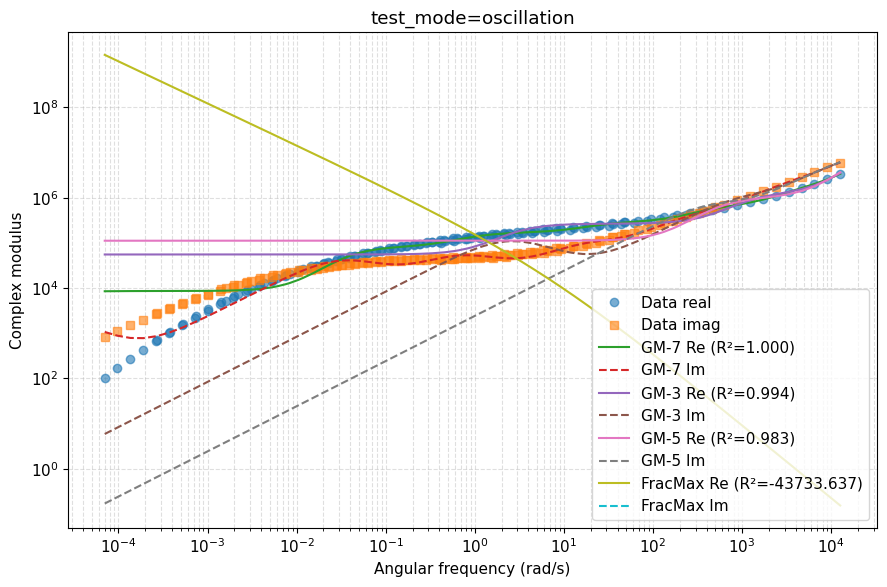

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   0%|          | 1/4000 [00:01<1:15:56,  1.14s/it, 1 steps of size 2.34e+00. acc. prob=0.00]

warmup:   0%|          | 20/4000 [00:01<03:04, 21.60it/s, 1023 steps of size 1.14e-02. acc. prob=0.69]

warmup:   1%|          | 30/4000 [00:01<02:08, 30.90it/s, 1023 steps of size 5.88e-03. acc. prob=0.71]

warmup:   1%|          | 39/4000 [00:01<01:40, 39.22it/s, 1023 steps of size 3.94e-03. acc. prob=0.72]

warmup:   1%|          | 48/4000 [00:01<01:24, 46.82it/s, 5 steps of size 3.37e-03. acc. prob=0.73]   

warmup:   2%|▏         | 60/4000 [00:01<01:06, 59.08it/s, 1023 steps of size 5.58e-03. acc. prob=0.74]

warmup:   2%|▏         | 69/4000 [00:01<01:03, 62.27it/s, 1023 steps of size 7.44e-03. acc. prob=0.75]

warmup:   2%|▏         | 78/4000 [00:02<01:02, 62.90it/s, 511 steps of size 1.70e-02. acc. prob=0.76] 

warmup:   2%|▏         | 89/4000 [00:02<00:56, 69.49it/s, 1023 steps of size 5.68e-03. acc. prob=0.76]

warmup:   2%|▏         | 98/4000 [00:02<00:53, 73.53it/s, 47 steps of size 4.18e-03. acc. prob=0.76]  

warmup:   3%|▎         | 126/4000 [00:02<00:31, 124.32it/s, 511 steps of size 4.86e-02. acc. prob=0.77]

warmup:   5%|▌         | 209/4000 [00:02<00:12, 308.20it/s, 31 steps of size 1.82e-01. acc. prob=0.78] 

warmup:   7%|▋         | 298/4000 [00:02<00:07, 465.85it/s, 31 steps of size 1.63e-01. acc. prob=0.78]

warmup:  10%|█         | 408/4000 [00:02<00:05, 642.85it/s, 15 steps of size 1.86e-01. acc. prob=0.78]

warmup:  13%|█▎        | 505/4000 [00:02<00:04, 735.13it/s, 31 steps of size 2.45e-01. acc. prob=0.79]

warmup:  15%|█▌        | 612/4000 [00:02<00:04, 831.27it/s, 15 steps of size 2.76e-01. acc. prob=0.79]

warmup:  18%|█▊        | 726/4000 [00:02<00:03, 919.49it/s, 31 steps of size 1.43e-01. acc. prob=0.79]

warmup:  21%|██        | 840/4000 [00:03<00:03, 982.01it/s, 31 steps of size 2.22e-01. acc. prob=0.79]

warmup:  24%|██▍       | 953/4000 [00:03<00:02, 1021.80it/s, 60 steps of size 3.94e-02. acc. prob=0.79]

sample:  26%|██▋       | 1057/4000 [00:03<00:03, 974.66it/s, 31 steps of size 1.46e-01. acc. prob=0.94]

sample:  29%|██▉       | 1158/4000 [00:03<00:02, 982.35it/s, 31 steps of size 1.46e-01. acc. prob=0.94]

sample:  31%|███▏      | 1258/4000 [00:03<00:02, 982.06it/s, 15 steps of size 1.46e-01. acc. prob=0.93]

sample:  34%|███▍      | 1357/4000 [00:03<00:02, 969.41it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  36%|███▋      | 1457/4000 [00:03<00:02, 975.38it/s, 47 steps of size 1.46e-01. acc. prob=0.93]

sample:  39%|███▉      | 1555/4000 [00:03<00:02, 973.78it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  41%|████▏     | 1653/4000 [00:03<00:02, 972.33it/s, 15 steps of size 1.46e-01. acc. prob=0.93]

sample:  44%|████▍     | 1751/4000 [00:03<00:02, 972.21it/s, 23 steps of size 1.46e-01. acc. prob=0.93]

sample:  46%|████▌     | 1849/4000 [00:04<00:02, 972.13it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  49%|████▊     | 1947/4000 [00:04<00:02, 967.47it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  51%|█████     | 2044/4000 [00:04<00:02, 964.22it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  54%|█████▎    | 2141/4000 [00:04<00:01, 965.64it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  56%|█████▌    | 2240/4000 [00:04<00:01, 971.61it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  58%|█████▊    | 2338/4000 [00:04<00:01, 968.11it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  61%|██████    | 2435/4000 [00:04<00:01, 966.34it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  63%|██████▎   | 2534/4000 [00:04<00:01, 970.75it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  66%|██████▌   | 2634/4000 [00:04<00:01, 978.99it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  68%|██████▊   | 2735/4000 [00:04<00:01, 987.98it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  71%|███████   | 2834/4000 [00:05<00:01, 982.10it/s, 31 steps of size 1.46e-01. acc. prob=0.93]

sample:  74%|███████▍  | 2959/4000 [00:05<00:00, 1058.89it/s, 37 steps of size 1.46e-01. acc. prob=0.89]

sample:  77%|███████▋  | 3069/4000 [00:05<00:00, 1068.99it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  79%|███████▉  | 3176/4000 [00:05<00:00, 1043.86it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  82%|████████▏ | 3281/4000 [00:05<00:00, 1023.51it/s, 15 steps of size 1.46e-01. acc. prob=0.88]

sample:  85%|████████▍ | 3384/4000 [00:05<00:00, 881.45it/s, 31 steps of size 1.46e-01. acc. prob=0.87] 

sample:  87%|████████▋ | 3484/4000 [00:05<00:00, 910.96it/s, 31 steps of size 1.46e-01. acc. prob=0.87]

sample:  90%|████████▉ | 3581/4000 [00:05<00:00, 926.92it/s, 15 steps of size 1.46e-01. acc. prob=0.88]

sample:  92%|█████████▏| 3676/4000 [00:05<00:00, 932.28it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  94%|█████████▍| 3777/4000 [00:06<00:00, 951.99it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample:  97%|█████████▋| 3874/4000 [00:06<00:00, 957.12it/s, 15 steps of size 1.46e-01. acc. prob=0.88]

sample:  99%|█████████▉| 3973/4000 [00:06<00:00, 963.79it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

sample: 100%|██████████| 4000/4000 [00:06<00:00, 636.26it/s, 31 steps of size 1.46e-01. acc. prob=0.88]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 23/4000 [00:00<00:17, 228.83it/s, 511 steps of size 1.20e-02. acc. prob=0.70]

warmup:   1%|          | 46/4000 [00:00<00:35, 112.19it/s, 7 steps of size 3.03e-03. acc. prob=0.73]  

warmup:   2%|▏         | 61/4000 [00:00<00:37, 104.19it/s, 1023 steps of size 5.63e-03. acc. prob=0.74]

warmup:   2%|▏         | 73/4000 [00:00<00:40, 97.62it/s, 511 steps of size 1.49e-02. acc. prob=0.76]  

warmup:   2%|▏         | 84/4000 [00:00<00:41, 94.55it/s, 511 steps of size 1.18e-02. acc. prob=0.76]

warmup:   2%|▏         | 94/4000 [00:00<00:42, 91.76it/s, 1023 steps of size 9.44e-03. acc. prob=0.76]

warmup:   3%|▎         | 134/4000 [00:01<00:22, 169.94it/s, 127 steps of size 9.18e-02. acc. prob=0.77]

warmup:   5%|▌         | 211/4000 [00:01<00:11, 329.78it/s, 31 steps of size 1.70e-01. acc. prob=0.78] 

warmup:   7%|▋         | 294/4000 [00:01<00:07, 467.64it/s, 63 steps of size 1.16e-01. acc. prob=0.78]

warmup:  10%|█         | 401/4000 [00:01<00:05, 637.10it/s, 15 steps of size 2.79e-01. acc. prob=0.79]

warmup:  12%|█▏        | 484/4000 [00:01<00:05, 686.96it/s, 127 steps of size 6.85e-02. acc. prob=0.78]

warmup:  14%|█▍        | 569/4000 [00:01<00:04, 733.94it/s, 31 steps of size 2.28e-01. acc. prob=0.79] 

warmup:  17%|█▋        | 672/4000 [00:01<00:04, 819.99it/s, 15 steps of size 2.20e-01. acc. prob=0.79]

warmup:  20%|█▉        | 781/4000 [00:01<00:03, 896.37it/s, 31 steps of size 1.64e-01. acc. prob=0.79]

warmup:  22%|██▏       | 886/4000 [00:01<00:03, 937.44it/s, 63 steps of size 1.18e-01. acc. prob=0.79]

warmup:  25%|██▌       | 1000/4000 [00:01<00:03, 993.36it/s, 63 steps of size 1.64e-01. acc. prob=0.79]

sample:  28%|██▊       | 1102/4000 [00:02<00:02, 998.99it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  30%|███       | 1208/4000 [00:02<00:02, 1015.66it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample:  33%|███▎      | 1311/4000 [00:02<00:02, 1005.77it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample:  35%|███▌      | 1416/4000 [00:02<00:02, 1016.62it/s, 31 steps of size 1.64e-01. acc. prob=0.87]

sample:  38%|███▊      | 1521/4000 [00:02<00:02, 1023.30it/s, 31 steps of size 1.64e-01. acc. prob=0.88]

sample:  41%|████      | 1624/4000 [00:02<00:02, 1025.14it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  43%|████▎     | 1727/4000 [00:02<00:02, 1021.73it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  46%|████▌     | 1830/4000 [00:02<00:02, 1017.00it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  48%|████▊     | 1932/4000 [00:02<00:02, 1010.54it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  51%|█████     | 2039/4000 [00:02<00:01, 1025.75it/s, 21 steps of size 1.64e-01. acc. prob=0.89]

sample:  54%|█████▎    | 2142/4000 [00:03<00:01, 1025.70it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  56%|█████▌    | 2245/4000 [00:03<00:01, 1025.08it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  59%|█████▊    | 2349/4000 [00:03<00:01, 1027.11it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  61%|██████▏   | 2456/4000 [00:03<00:01, 1036.57it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  64%|██████▍   | 2560/4000 [00:03<00:01, 1031.20it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  67%|██████▋   | 2664/4000 [00:03<00:01, 1023.93it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  69%|██████▉   | 2767/4000 [00:03<00:01, 1020.41it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  72%|███████▏  | 2871/4000 [00:03<00:01, 1025.55it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  74%|███████▍  | 2974/4000 [00:03<00:01, 1019.05it/s, 15 steps of size 1.64e-01. acc. prob=0.89]

sample:  77%|███████▋  | 3078/4000 [00:03<00:00, 1024.94it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  80%|███████▉  | 3181/4000 [00:04<00:00, 1008.49it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  82%|████████▏ | 3283/4000 [00:04<00:00, 1010.13it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  85%|████████▍ | 3385/4000 [00:04<00:00, 1006.85it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  87%|████████▋ | 3486/4000 [00:04<00:00, 1003.19it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  90%|████████▉ | 3591/4000 [00:04<00:00, 1015.56it/s, 31 steps of size 1.64e-01. acc. prob=0.89]

sample:  92%|█████████▏| 3693/4000 [00:04<00:00, 1011.27it/s, 31 steps of size 1.64e-01. acc. prob=0.90]

sample:  95%|█████████▍| 3795/4000 [00:04<00:00, 1008.55it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample:  97%|█████████▋| 3896/4000 [00:04<00:00, 1004.56it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample: 100%|█████████▉| 3999/4000 [00:04<00:00, 1011.83it/s, 15 steps of size 1.64e-01. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 819.25it/s, 31 steps of size 1.64e-01. acc. prob=0.90] 

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 24/4000 [00:00<00:17, 228.99it/s, 255 steps of size 1.72e-02. acc. prob=0.71]

warmup:   1%|          | 47/4000 [00:00<00:34, 114.58it/s, 895 steps of size 8.72e-03. acc. prob=0.74]

warmup:   2%|▏         | 62/4000 [00:00<00:36, 108.90it/s, 511 steps of size 1.07e-02. acc. prob=0.75]

warmup:   2%|▏         | 75/4000 [00:00<00:38, 101.11it/s, 511 steps of size 1.43e-02. acc. prob=0.76]

warmup:   2%|▏         | 86/4000 [00:00<00:38, 102.04it/s, 511 steps of size 1.13e-02. acc. prob=0.76]

warmup:   2%|▏         | 97/4000 [00:00<00:38, 100.70it/s, 255 steps of size 1.90e-02. acc. prob=0.76]

warmup:   4%|▍         | 158/4000 [00:00<00:16, 235.69it/s, 15 steps of size 4.86e-02. acc. prob=0.77]

warmup:   6%|▌         | 232/4000 [00:01<00:10, 373.95it/s, 31 steps of size 1.45e-01. acc. prob=0.78]

warmup:   8%|▊         | 309/4000 [00:01<00:07, 484.82it/s, 31 steps of size 2.22e-01. acc. prob=0.78]

warmup:  10%|▉         | 394/4000 [00:01<00:06, 588.80it/s, 15 steps of size 2.94e-01. acc. prob=0.79]

warmup:  12%|█▏        | 498/4000 [00:01<00:04, 717.52it/s, 31 steps of size 2.21e-01. acc. prob=0.79]

warmup:  15%|█▌        | 606/4000 [00:01<00:04, 822.28it/s, 31 steps of size 1.07e-01. acc. prob=0.79]

warmup:  18%|█▊        | 720/4000 [00:01<00:03, 914.13it/s, 15 steps of size 2.01e-01. acc. prob=0.79]

warmup:  20%|██        | 814/4000 [00:01<00:03, 887.78it/s, 63 steps of size 6.28e-02. acc. prob=0.79]

warmup:  23%|██▎       | 935/4000 [00:01<00:03, 979.90it/s, 31 steps of size 1.95e-01. acc. prob=0.79]

sample:  26%|██▌       | 1035/4000 [00:01<00:03, 933.45it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  28%|██▊       | 1130/4000 [00:02<00:03, 937.43it/s, 31 steps of size 1.34e-01. acc. prob=0.93]

sample:  31%|███       | 1225/4000 [00:02<00:02, 938.34it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  33%|███▎      | 1320/4000 [00:02<00:02, 937.61it/s, 15 steps of size 1.34e-01. acc. prob=0.94]

sample:  35%|███▌      | 1415/4000 [00:02<00:02, 938.01it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  38%|███▊      | 1510/4000 [00:02<00:02, 880.00it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  40%|███▉      | 1599/4000 [00:02<00:02, 823.90it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  42%|████▏     | 1695/4000 [00:02<00:02, 859.12it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  45%|████▍     | 1791/4000 [00:02<00:02, 885.28it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  47%|████▋     | 1886/4000 [00:02<00:02, 903.73it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  50%|████▉     | 1984/4000 [00:02<00:02, 923.73it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  52%|█████▏    | 2082/4000 [00:03<00:02, 938.86it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  54%|█████▍    | 2177/4000 [00:03<00:01, 937.73it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  57%|█████▋    | 2272/4000 [00:03<00:01, 929.98it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  59%|█████▉    | 2367/4000 [00:03<00:01, 934.77it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  62%|██████▏   | 2461/4000 [00:03<00:01, 932.15it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  64%|██████▍   | 2557/4000 [00:03<00:01, 938.23it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  66%|██████▋   | 2652/4000 [00:03<00:01, 940.83it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  69%|██████▊   | 2747/4000 [00:03<00:01, 941.56it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  71%|███████   | 2842/4000 [00:03<00:01, 940.12it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  73%|███████▎  | 2937/4000 [00:04<00:01, 941.43it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  76%|███████▌  | 3032/4000 [00:04<00:01, 942.95it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  78%|███████▊  | 3127/4000 [00:04<00:00, 944.92it/s, 15 steps of size 1.34e-01. acc. prob=0.94]

sample:  81%|████████  | 3222/4000 [00:04<00:00, 940.86it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  83%|████████▎ | 3317/4000 [00:04<00:00, 941.48it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  85%|████████▌ | 3414/4000 [00:04<00:00, 946.94it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  88%|████████▊ | 3509/4000 [00:04<00:00, 943.16it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  90%|█████████ | 3606/4000 [00:04<00:00, 948.10it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  93%|█████████▎| 3703/4000 [00:04<00:00, 953.41it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  95%|█████████▍| 3799/4000 [00:04<00:00, 954.64it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample:  97%|█████████▋| 3895/4000 [00:05<00:00, 954.95it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample: 100%|█████████▉| 3992/4000 [00:05<00:00, 957.47it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

sample: 100%|██████████| 4000/4000 [00:05<00:00, 781.47it/s, 31 steps of size 1.34e-01. acc. prob=0.94]

  0%|          | 0/4000 [00:00<?, ?it/s]

warmup:   1%|          | 31/4000 [00:00<00:14, 280.48it/s, 1023 steps of size 5.66e-03. acc. prob=0.71]

warmup:   2%|▏         | 60/4000 [00:00<00:32, 120.30it/s, 1023 steps of size 6.07e-03. acc. prob=0.74]

warmup:   2%|▏         | 77/4000 [00:00<00:35, 109.92it/s, 511 steps of size 1.50e-02. acc. prob=0.76] 

warmup:   2%|▏         | 91/4000 [00:00<00:36, 106.56it/s, 511 steps of size 8.68e-03. acc. prob=0.76]

warmup:   3%|▎         | 106/4000 [00:00<00:33, 116.39it/s, 31 steps of size 2.54e-01. acc. prob=0.77]

warmup:   4%|▍         | 173/4000 [00:00<00:15, 253.41it/s, 15 steps of size 3.66e-01. acc. prob=0.78]

warmup:   6%|▋         | 257/4000 [00:01<00:09, 405.96it/s, 127 steps of size 5.72e-02. acc. prob=0.78]

warmup:   9%|▊         | 341/4000 [00:01<00:07, 522.35it/s, 31 steps of size 1.36e-01. acc. prob=0.78] 

warmup:  11%|█         | 444/4000 [00:01<00:05, 662.69it/s, 15 steps of size 1.48e-01. acc. prob=0.79]

warmup:  13%|█▎        | 536/4000 [00:01<00:04, 735.57it/s, 15 steps of size 2.62e-01. acc. prob=0.79]

warmup:  16%|█▌        | 646/4000 [00:01<00:03, 840.17it/s, 15 steps of size 2.34e-01. acc. prob=0.79]

warmup:  19%|█▉        | 766/4000 [00:01<00:03, 942.76it/s, 63 steps of size 1.71e-01. acc. prob=0.79]

warmup:  22%|██▏       | 886/4000 [00:01<00:03, 1016.24it/s, 15 steps of size 2.13e-01. acc. prob=0.79]

warmup:  25%|██▍       | 991/4000 [00:01<00:03, 1000.85it/s, 31 steps of size 3.58e-01. acc. prob=0.79]

sample:  27%|██▋       | 1093/4000 [00:01<00:02, 992.45it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  30%|██▉       | 1194/4000 [00:02<00:02, 981.30it/s, 31 steps of size 1.63e-01. acc. prob=0.94]

sample:  32%|███▏      | 1294/4000 [00:02<00:02, 978.72it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  35%|███▍      | 1397/4000 [00:02<00:02, 993.11it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  38%|███▊      | 1502/4000 [00:02<00:02, 1007.80it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  40%|████      | 1604/4000 [00:02<00:02, 999.17it/s, 31 steps of size 1.63e-01. acc. prob=0.93] 

sample:  43%|████▎     | 1705/4000 [00:02<00:02, 993.19it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  45%|████▌     | 1805/4000 [00:02<00:02, 994.13it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  48%|████▊     | 1905/4000 [00:02<00:02, 986.35it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  50%|█████     | 2008/4000 [00:02<00:01, 997.10it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  53%|█████▎    | 2108/4000 [00:02<00:01, 985.16it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  55%|█████▌    | 2207/4000 [00:03<00:01, 983.81it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  58%|█████▊    | 2306/4000 [00:03<00:01, 981.68it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  60%|██████    | 2406/4000 [00:03<00:01, 986.42it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  63%|██████▎   | 2507/4000 [00:03<00:01, 991.97it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  65%|██████▌   | 2607/4000 [00:03<00:01, 992.34it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  68%|██████▊   | 2708/4000 [00:03<00:01, 996.73it/s, 31 steps of size 1.63e-01. acc. prob=0.93]

sample:  70%|███████   | 2814/4000 [00:03<00:01, 1015.57it/s, 7 steps of size 1.63e-01. acc. prob=0.90]

sample:  73%|███████▎  | 2916/4000 [00:03<00:01, 1011.91it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  75%|███████▌  | 3018/4000 [00:03<00:00, 1005.48it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  78%|███████▊  | 3119/4000 [00:03<00:00, 992.50it/s, 15 steps of size 1.63e-01. acc. prob=0.89] 

sample:  80%|████████  | 3219/4000 [00:04<00:00, 991.81it/s, 31 steps of size 1.63e-01. acc. prob=0.89]

sample:  83%|████████▎ | 3319/4000 [00:04<00:00, 987.32it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  85%|████████▌ | 3418/4000 [00:04<00:00, 985.31it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  88%|████████▊ | 3519/4000 [00:04<00:00, 991.94it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  90%|█████████ | 3619/4000 [00:04<00:00, 984.70it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  93%|█████████▎| 3721/4000 [00:04<00:00, 992.58it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  96%|█████████▌| 3821/4000 [00:04<00:00, 989.77it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

sample:  98%|█████████▊| 3922/4000 [00:04<00:00, 994.98it/s, 15 steps of size 1.63e-01. acc. prob=0.90]

sample: 100%|██████████| 4000/4000 [00:04<00:00, 828.27it/s, 31 steps of size 1.63e-01. acc. prob=0.90]

/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/backends/matplotlib/pairplot.py:223: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of resulting pair plots with these variables, generating only a 8x8 grid
  warnings.warn(


array([[<Axes: ylabel='E_2'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_3'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_4'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_5'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_6'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_7'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: ylabel='E_inf'>, <Axes: >, <Axes: >, <Axes: >, <Axes: >,
        <Axes: >, <Axes: >, <Axes: >],
       [<Axes: xlabel='E_1', ylabel='sigma_imag'>, <Axes: xlabel='E_2'>,
        <Axes: xlabel='E_3'>, <Axes: xlabel='E_4'>, <Axes: xlabel='E_5'>,
        <Axes: xlabel='E_6'>, <Axes: xlabel='E_7'>,
        <Axes: xlabel='E_inf'>]], dt

array([<Axes: title={'center': '94.0% HDI'}>], dtype=object)

Skipping energy plot due to: 'Dataset' object has no attribute 'energy'


/Users/b80985/Projects/rheojax/.venv/lib/python3.13/site-packages/arviz/plots/plot_utils.py:270: UserWarning: rcParams['plot.max_subplots'] (40) is smaller than the number of variables to plot (68) in plot_autocorr, generating only 40 plots
  warnings.warn(


array([[<Axes: title={'center': 'E_1\n0'}>,
        <Axes: title={'center': 'E_1\n1'}>,
        <Axes: title={'center': 'E_1\n2'}>,
        <Axes: title={'center': 'E_1\n3'}>],
       [<Axes: title={'center': 'E_2\n0'}>,
        <Axes: title={'center': 'E_2\n1'}>,
        <Axes: title={'center': 'E_2\n2'}>,
        <Axes: title={'center': 'E_2\n3'}>],
       [<Axes: title={'center': 'E_3\n0'}>,
        <Axes: title={'center': 'E_3\n1'}>,
        <Axes: title={'center': 'E_3\n2'}>,
        <Axes: title={'center': 'E_3\n3'}>],
       [<Axes: title={'center': 'E_4\n0'}>,
        <Axes: title={'center': 'E_4\n1'}>,
        <Axes: title={'center': 'E_4\n2'}>,
        <Axes: title={'center': 'E_4\n3'}>],
       [<Axes: title={'center': 'E_5\n0'}>,
        <Axes: title={'center': 'E_5\n1'}>,
        <Axes: title={'center': 'E_5\n2'}>,
        <Axes: title={'center': 'E_5\n3'}>],
       [<Axes: title={'center': 'E_6\n0'}>,
        <Axes: title={'center': 'E_6\n1'}>,
        <Axes: title={'cent

array([[<Axes: title={'center': 'E_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_2'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_3'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_4'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_6'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_7'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Rank (all chains)', ylabel='Chain'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Rank (all chains)', ylabel='Chain'>,
        <Axes: title={'center': 'tau_2'}, xla

array([[<Axes: title={'center': 'E_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_2'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_3'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_4'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'E_5'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_6'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_7'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'E_inf'}, xlabel='Total number of draws', ylabel='ESS'>],
       [<Axes: title={'center': 'sigma_imag'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'sigma_real'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'center': 'tau_1'}, xlabel='Total number of draws', ylabel='ESS'>,
        <Axes: title={'

In [6]:
# Unified workflow: load → NLSQ fits → best by R² → Bayesian → diagnostics
import arviz as az

# Fallback R² for complex data
if 'r2_complex' not in globals():
    def r2_complex(y_true, y_pred):
        y_true = np.asarray(y_true)
        y_pred = np.asarray(y_pred)
        ss_res = np.sum(np.abs(y_true - y_pred) ** 2)
        ss_tot = np.sum(np.abs(y_true - np.mean(y_true)) ** 2)
        return 1 - ss_res / ss_tot



# Handle models that return real/imag columns instead of complex numbers
if '_coerce_pred' not in globals():
    def _coerce_pred(pred):
        arr = np.asarray(pred)
        if arr.ndim == 2 and arr.shape[1] == 2 and not np.iscomplexobj(arr):
            arr = arr[:, 0] + 1j * arr[:, 1]
        return arr


NUTS_CONFIG = dict(num_chains=4, num_warmup=1000, num_samples=3000)

def _detect_datasets():
    datasets = []
    if 'G_star' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': G_star,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    elif 'Gp' in globals() and 'Gpp' in globals() and 'omega' in globals():
        datasets.append({
            'X': omega,
            'y': Gp + 1j * Gpp,
            'test_mode': 'oscillation',
            'x_label': 'Angular frequency (rad/s)',
            'y_label': 'Complex modulus',
        })
    if 'master' in globals() and hasattr(master, 'x') and hasattr(master, 'y'):
        datasets.append({
            'X': master.x,
            'y': master.y,
            'test_mode': master.metadata.get('test_mode', 'oscillation') if hasattr(master, 'metadata') else 'oscillation',
            'x_label': 'Shifted frequency',
            'y_label': 'Mastercurve modulus',
        })
    if 't' in globals() and 'G' in globals():
        datasets.append({
            'X': t,
            'y': G,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })

    if 't' in globals() and 'E_t' in globals():
        datasets.append({
            'X': t,
            'y': E_t,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Relaxation modulus',
        })
    if 't' in globals() and 'sigma' in globals():
        datasets.append({
            'X': t,
            'y': sigma,
            'test_mode': 'relaxation',
            'x_label': 'Time (s)',
            'y_label': 'Stress (Pa)',
        })
    if 't' in globals() and 'J' in globals():
        datasets.append({
            'X': t,
            'y': J,
            'test_mode': 'creep',
            'x_label': 'Time (s)',
            'y_label': 'Creep compliance',
        })
    if 'all_df' in globals() and hasattr(all_df, 'columns') and 'phi' in all_df.columns:
        for phi, frame in all_df.groupby('phi'):
            x_vals = frame.iloc[:, 0].to_numpy()
            y_vals = frame.iloc[:, 1].to_numpy()
            datasets.append({
                'X': x_vals,
                'y': y_vals,
                'test_mode': 'rotation',
                'x_label': f'Shear rate 1/s (phi={phi})',
                'y_label': 'Stress (Pa)',
                'label': f'phi={phi}',
            })
    if not datasets:
        raise ValueError('No datasets detected; ensure data variables are defined before running this cell.')
    return datasets


def _collect_candidate_models():
    if 'candidates' in globals() and isinstance(candidates, (list, tuple)) and candidates:
        return candidates
    models = []
    for name, obj in globals().items():
        if isinstance(obj, type):
            continue  # skip classes; require initialized models
        if hasattr(obj, 'fit_bayesian') and hasattr(obj, 'predict'):
            models.append((name, obj))
    if not models:
        raise ValueError('No candidate models found; define models before running this cell.')
    return models


def _plot_data_and_fits(ds, fits):
    fig, ax = plt.subplots(figsize=(9, 6))
    X_plot = ds['X']
    y_true = ds['y']
    if np.iscomplexobj(y_true):
        x_axis = X_plot / (2 * np.pi) if ds['test_mode'] == 'oscillation' else X_plot
        ax.loglog(x_axis, np.real(y_true), 'o', label="Data real", alpha=0.6)
        ax.loglog(x_axis, np.imag(y_true), 's', label="Data imag", alpha=0.6)
        for rec in fits:
            pred = _coerce_pred(rec['pred'])
            ax.loglog(x_axis, np.real(pred), '-', label=f"{rec['name']} Re (R²={rec['r2']:.3f})")
            ax.loglog(x_axis, np.imag(pred), '--', label=f"{rec['name']} Im")
    else:
        x_axis = X_plot
        ax.loglog(x_axis, y_true, 'o', label='Data', alpha=0.6)
        for rec in fits:
            ax.loglog(x_axis, rec['pred'], '-', label=f"{rec['name']} (R²={rec['r2']:.3f})")
    ax.set_xlabel(ds.get('x_label', 'X'))
    ax.set_ylabel(ds.get('y_label', 'Response'))
    ax.set_title(ds.get('label', f"test_mode={ds['test_mode']}"))
    ax.grid(True, which='both', ls='--', alpha=0.4)
    ax.legend()
    plt.tight_layout()
    display(fig)
    plt.close(fig)


def _plot_diagnostics(idata):
    diag_plotters = [
        ('pair', lambda: az.plot_pair(idata, divergences=True, kind='kde')),
        ('forest', lambda: az.plot_forest(idata, combined=True)),
        ('energy', lambda: az.plot_energy(idata)),
        ('autocorr', lambda: az.plot_autocorr(idata)),
        ('rank', lambda: az.plot_rank(idata)),
        ('ess', lambda: az.plot_ess(idata, kind='evolution')),
    ]
    for name, plot_fn in diag_plotters:
        try:
            obj = plot_fn()
        except Exception as exc:
            print(f"Skipping {name} plot due to: {exc}")
            continue
        plt.tight_layout()
        display(obj)
        plt.close('all')


datasets = _detect_datasets()
model_entries = _collect_candidate_models()

for ds in datasets:
    fits = []
    for name, model in model_entries:
        fitted_model = model
        fit_kwargs = {'test_mode': ds['test_mode'], 'use_log_residuals': True}
        try:
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except TypeError:
            fit_kwargs.pop('use_log_residuals', None)
            fitted_model.fit(ds['X'], ds['y'], **fit_kwargs)
        except Exception as exc:
            print(f"Skipping {name} due to fit error: {exc}")
            continue
        predict_kwargs = {'test_mode': ds['test_mode']} if 'test_mode' in fit_kwargs else {}
        try:
            pred = _coerce_pred(fitted_model.predict(ds['X'], **predict_kwargs))
        except Exception as exc:
            print(f"Skipping {name} due to predict error: {exc}")
            continue
        try:
            r2_val = r2_complex(ds['y'], pred) if np.iscomplexobj(ds['y']) else fitted_model.score(ds['X'], ds['y'])
        except Exception as exc:
            print(f"Skipping {name} due to scoring error: {exc}")
            continue
        fits.append({'name': name, 'model': fitted_model, 'pred': pred, 'r2': float(r2_val)})

    if not fits:
        print('No successful fits for dataset; skipping Bayesian step.')
        continue

    fits.sort(key=lambda rec: rec['r2'], reverse=True)
    best = fits[0]
    print(f"Model ranking (R²): {[ (rec['name'], round(rec['r2'], 3)) for rec in fits ]}")
    _plot_data_and_fits(ds, fits)

    try:
        bayes_result = best['model'].fit_bayesian(
            ds['X'],
            ds['y'],
            **NUTS_CONFIG,
            test_mode=ds['test_mode'],
        )
        idata = bayes_result.to_inference_data()
        _plot_diagnostics(idata)
    except Exception as exc:
        print(f"Skipping Bayesian step for {best['name']} due to: {exc}")
